# Initial Experiments in Machine (No Feature Selection)
In this notebook, I carry out a number of experiments that really just involves throwing things at a AutoML. 
There is no feature selection performed. They are redundant but I have included them as it shows my experimental process.
The legitimate machine learning experiments are performed in the next notebook.


In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime as dt
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import pycaret.classification as c
import pycaret.regression as r
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_pickle('../data/all.csv')

In [3]:
sns.set_style('white')
plt.rcParams['axes.spines.right'] = False  # display axis spines
plt.rcParams['axes.spines.top'] = False
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams["axes.grid.axis"] ="y"
plt.rcParams["axes.grid"] = True

## Mood Prediction

### All First Time

In [4]:
columns = ['Date', 'Mood_bin_num', 'Time', 'Day',
       'Entertainment', 'Exercise', 'Family', 'Food', 'Friends', 'Hobby',
       'Love', 'Music', 'NightOut', 'Projects', 'School', 'SelfCare', 'Sleep',
       'CaffeineCups', 'AlcoholDrinks', 'Stress', 'Sleepiness',
       'PreviousNightMood', 'StressR7DM',
       'SleepinessR7DM', 'AtHome', 'CaloriesBurned', 'Steps', 'Distance',
       'Floors', 'SedentaryMinutes', 'LightlyActiveMinutes',
       'FairlyActiveMinutes', 'VeryActiveMinutes', 'ActivityCalories',
       'CaloriesBurned_R7DM', 'Steps_R7DM', 'Distance_R7DM', 'Floors_R7DM',
       'SedentaryMinutes_R7DM', 'LightlyActiveMinutes_R7DM',
       'FairlyActiveMinutes_R7DM', 'VeryActiveMinutes_R7DM',
       'ActivityCalories_R7DM', 'FB_Onset', 'FB_Offset', 'FB_TST', 'FB_WASO',
       'FB_NOA', 'FB_TIB', 'FB_REMSD', 'FB_LSD', 'FB_DSD', 'FB_TSDP', 'FB_AI',
       'FB_SWSP', 'FB_REMP', 'FB_SMI', 'FB_Midpoint', 'IsWeekend',
       'FB_SR', 'SS_Bedtime', 'SS_SOL', 'SS_TST', 'SS_WASO',
       'SS_Waketime', 'SS_TIB', 'SS_NOA', 'SS_LSD', 'SS_DSD', 'SS_REMSD',
       'SS_ARR', 'SS_SS', 'SS_MS', 'SS_BS', 'SS_SE', 'SS_SMI', 'SS_AI',
       'SS_REMP', 'SS_SWSP', 'SS_Onset', 'SS_Offset', 'SS_TSDP', 'SS_Midpoint',
       'SS_SR']

In [5]:
num = ['CaffeineCups', 'AlcoholDrinks', 'Stress', 'Sleepiness',
       'PreviousNightMood', 'StressR7DM',
       'SleepinessR7DM', 'CaloriesBurned', 'Steps', 'Distance',
       'Floors', 'SedentaryMinutes', 'LightlyActiveMinutes',
       'FairlyActiveMinutes', 'VeryActiveMinutes', 'ActivityCalories',
       'CaloriesBurned_R7DM', 'Steps_R7DM', 'Distance_R7DM', 'Floors_R7DM',
       'SedentaryMinutes_R7DM', 'LightlyActiveMinutes_R7DM',
       'FairlyActiveMinutes_R7DM', 'VeryActiveMinutes_R7DM',
       'ActivityCalories_R7DM', 'FB_Onset', 'FB_Offset', 'FB_TST', 'FB_WASO',
       'FB_NOA', 'FB_TIB', 'FB_REMSD', 'FB_LSD', 'FB_DSD', 'FB_TSDP', 'FB_AI',
       'FB_SWSP', 'FB_REMP', 'FB_SMI', 'FB_Midpoint',
       'FB_SR', 'SS_Bedtime', 'SS_SOL', 'SS_TST', 'SS_WASO',
       'SS_Waketime', 'SS_TIB', 'SS_NOA', 'SS_LSD', 'SS_DSD', 'SS_REMSD',
       'SS_ARR', 'SS_SS', 'SS_MS', 'SS_BS', 'SS_SE', 'SS_SMI', 'SS_AI',
       'SS_REMP', 'SS_SWSP', 'SS_Onset', 'SS_Offset', 'SS_TSDP', 'SS_Midpoint',
       'SS_SR']
bin = ['IsWeekend', 'AtHome', 'Entertainment', 'Exercise', 'Family', 'Food', 'Friends', 'Hobby',
       'Love', 'Music', 'NightOut', 'Projects', 'School', 'SelfCare', 'Sleep']
cat = ['Day']
date = ['Date']

#### Model Development

In [6]:
from pycaret.classification import *
s = c.setup(df[columns].dropna(thresh=len(columns) - 2), 
           target = 'Mood_bin_num', 
           numeric_features=num, 
           date_features=date,
           normalize=True, 
           polynomial_features=True, 
           fix_imbalance=True, session_id=101)

,Description,Value
0,session_id,101
1,Target,Mood_bin_num
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(28, 84)"
5,Missing Values,True
6,Numeric Features,81
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
best_all = c.compare_models(sort='Precision', exclude=['knn'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7500,0.0000,0.8500,0.8000,0.8000,nan,0.4000,0.0100
lr,Logistic Regression,0.7000,0.7000,0.8500,0.7500,0.7667,nan,0.3000,0.6100
et,Extra Trees Classifier,0.7500,0.7000,0.8500,0.7500,0.7667,nan,0.4000,0.0760
svm,SVM - Linear Kernel,0.7500,0.0000,0.7500,0.7000,0.7000,nan,0.4000,0.0120
rf,Random Forest Classifier,0.6500,0.6000,0.8000,0.6500,0.7000,nan,0.3000,0.0840
nb,Naive Bayes,0.5500,0.4500,0.6000,0.5000,0.5333,nan,-0.1000,0.0110
ada,Ada Boost Classifier,0.5500,0.6000,0.6500,0.4500,0.5000,nan,0.0000,0.0440
dt,Decision Tree Classifier,0.5000,0.4500,0.5500,0.4000,0.4333,0.1000,0.1000,0.0110
qda,Quadratic Discriminant Analysis,0.5000,0.4000,0.6000,0.4000,0.4667,nan,0.0000,0.0130
gbc,Gradient Boosting Classifier,0.4000,0.3000,0.5500,0.3500,0.4000,-0.1000,-0.1000,0.0320


In [8]:
tuned_all = c.tune_model(best_all)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.0000,1.0000,0.5000,0.6667,0.0000,0.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,-1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.5000,0.0000,0.5000,1.0000,0.6667,0.0000,0.0000


In [9]:
print(tuned_all)

RidgeClassifier(alpha=9.78, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=101, solver='auto',
                tol=0.001)


In [10]:
c.predict_model(tuned_all)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.4444,0.4250,0.6000,0.5000,0.5455,-0.1538,-0.1581


,Time,Entertainment,Exercise,Family,Food,Friends,Hobby,Love,Music,NightOut,...,Date_weekday_0,Date_weekday_1,Date_weekday_2,Date_weekday_3,Date_weekday_4,Date_weekday_5,Date_is_month_end_0,Date_is_month_start_1,Mood_bin_num,Label
0,-0.616801,0,1,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
1,0.197228,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
2,0.281439,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,1
3,-0.495164,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1
4,-0.532591,0,0,0,0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1
5,0.164480,0,1,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1
6,0.548103,0,0,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,0
7,-0.598088,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
8,0.145767,0,1,1,0,1,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0


In [11]:
model = tuned_all

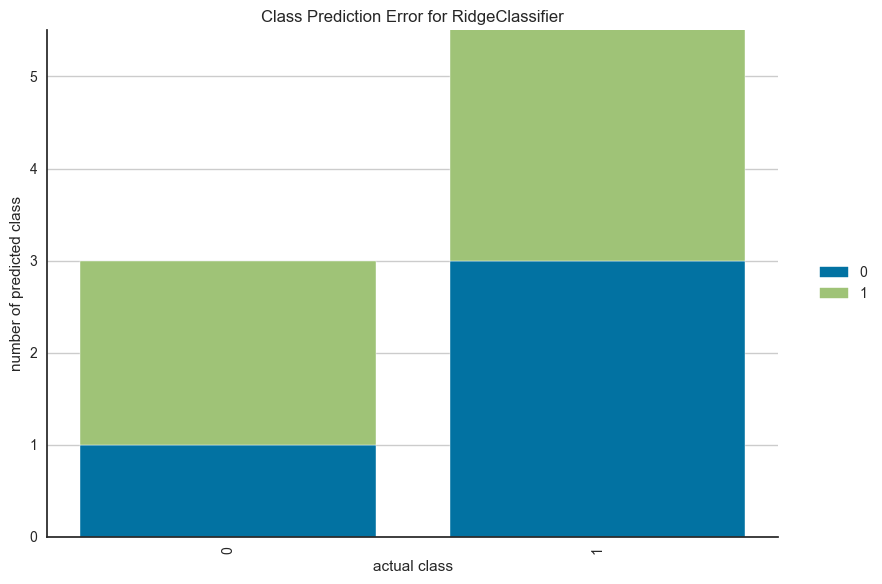

In [12]:
try:
    c.plot_model(estimator=model, plot='error')
except:
    pass

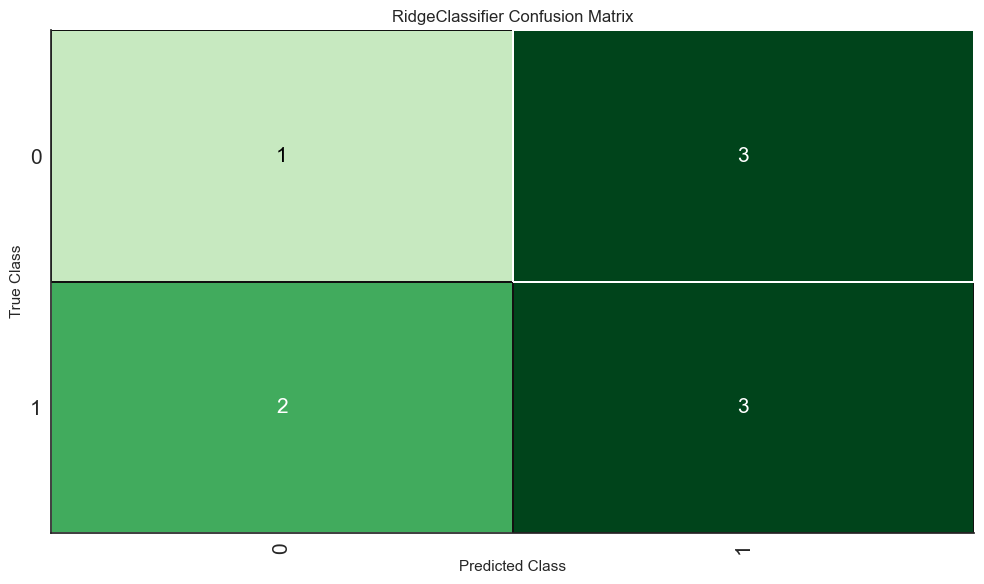

In [13]:
try:
    c.plot_model(tuned_all, plot='confusion_matrix')
except:
    pass

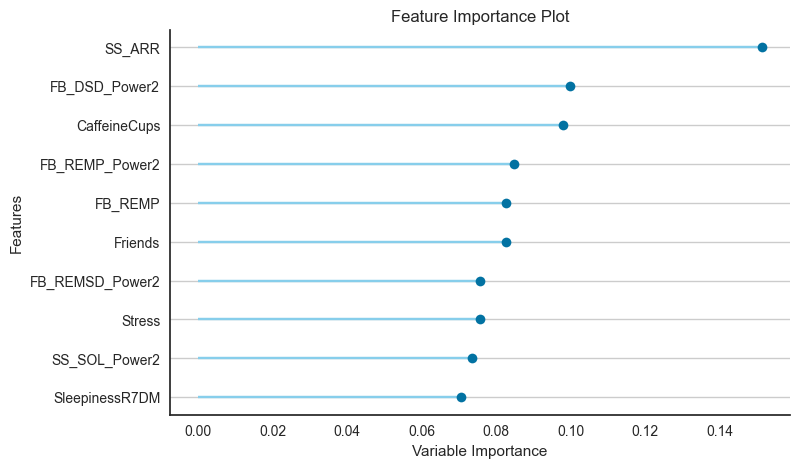

In [14]:
try:
    c.plot_model(tuned_all, plot='feature')
except:
    pass

In [15]:
try:
    c.plot_model(estimator=model, plot='calibration')
except:
    pass

### SleepScore

In [16]:
columns = ['Mood_bin_num', 'SS_Bedtime', 'SS_SOL', 'SS_TST', 'SS_WASO',
       'SS_Waketime', 'SS_TIB', 'SS_NOA', 'SS_LSD', 'SS_DSD', 'SS_REMSD',
       'SS_ARR', 'SS_SS', 'SS_MS', 'SS_BS', 'SS_SE', 'SS_SMI', 'SS_AI',
       'SS_REMP', 'SS_SWSP', 'SS_Onset', 'SS_Offset', 'SS_TSDP', 'SS_Midpoint',
       'SS_SR']
num =  ['SS_Bedtime', 'SS_SOL', 'SS_TST', 'SS_WASO',
       'SS_Waketime', 'SS_TIB', 'SS_NOA', 'SS_LSD', 'SS_DSD', 'SS_REMSD',
       'SS_ARR', 'SS_SS', 'SS_MS', 'SS_BS', 'SS_SE', 'SS_SMI', 'SS_AI',
       'SS_REMP', 'SS_SWSP', 'SS_Onset', 'SS_Offset', 'SS_TSDP', 'SS_Midpoint',
       'SS_SR']

In [17]:
sleepscore = c.setup(df[columns].dropna(thresh=len(columns) - 2), 
                   target = 'Mood_bin_num', 
                   numeric_features=num, 
                   feature_selection=True,
                   normalize=True, 
                   polynomial_features=True, 
                   fix_imbalance=True, 
                     session_id=101)

,Description,Value
0,session_id,101
1,Target,Mood_bin_num
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(42, 25)"
5,Missing Values,True
6,Numeric Features,24
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
best_sleepscore = c.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7667,0.8500,0.7000,0.8167,0.7300,0.4700,0.5000,0.0350
dt,Decision Tree Classifier,0.7333,0.7250,0.7000,0.7500,0.7000,0.4200,0.4500,0.0070
svm,SVM - Linear Kernel,0.7333,0.0000,0.8000,0.7333,0.7433,0.4300,0.4500,0.0090
lda,Linear Discriminant Analysis,0.7167,0.7750,0.7000,0.7500,0.6833,0.4100,0.4500,0.0080
lr,Logistic Regression,0.7000,0.7000,0.7000,0.6333,0.6433,0.3300,0.3500,0.0090
ridge,Ridge Classifier,0.6833,0.0000,0.8500,0.7667,0.7433,0.3600,0.4000,0.0080
rf,Random Forest Classifier,0.6667,0.6000,0.7000,0.6333,0.6600,0.2200,0.2000,0.0900
et,Extra Trees Classifier,0.6333,0.7000,0.7500,0.6500,0.6733,0.1300,0.1500,0.0710
qda,Quadratic Discriminant Analysis,0.5500,0.5000,1.0000,0.5500,0.6967,0.0000,0.0000,0.0080
nb,Naive Bayes,0.5000,0.4500,0.6000,0.5333,0.5433,-0.0100,-0.0500,0.0070


In [19]:
print(best_sleepscore)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=101)


In [20]:
tuned_sleepscore = c.tune_model(best_sleepscore)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.6667,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.3333,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6667,0.7500,0.5000,1.0000,0.6667,0.4000,0.5000
5,0.6667,0.7500,0.5000,1.0000,0.6667,0.4000,0.5000
6,0.6667,0.7500,0.5000,1.0000,0.6667,0.4000,0.5000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.3333,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [21]:
c.predict_model(tuned_sleepscore)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.3846,0.4167,0.0000,0.0000,0.0000,-0.1556,-0.3118


,SS_Waketime,SS_ARR_Power2,SS_DSD_Power2,SS_SWSP_Power2,SS_AI,SS_WASO,SS_SS,SS_SE_Power2,SS_SR,SS_TST_Power2,...,SS_MS_Power2,SS_SOL,SS_SR_Power2,SS_TSDP,SS_NOA,SS_REMP,SS_REMSD_Power2,Mood_bin_num,Label,Score
0,-0.350465,-0.264228,-0.573908,-1.066916,1.464098,0.992249,1.213640,-0.627755,1.806725e-07,0.754245,...,1.394740,-0.285273,-0.209719,1.147170,2.072472,0.402696,0.613451,0,0,0.7311
1,-0.284582,0.039899,0.578877,0.791921,1.275224,0.574351,0.811405,0.034908,3.866335e-01,0.057279,...,0.833957,-0.862452,0.162365,0.307727,1.488961,0.668416,0.564455,0,0,0.7311
2,0.100761,-0.385263,-0.602267,2.907355,1.426323,0.574351,-5.423237,-1.758558,1.806725e-07,-2.713293,...,-1.350951,-0.990714,-0.209719,-3.050046,-0.261574,0.574066,-0.946205,1,0,0.7311
3,1.465815,1.278326,0.046675,0.684384,0.519729,4.216027,-2.406475,-3.119804,-8.762318e-01,-0.681192,...,-1.664744,-0.990714,-0.820911,0.787409,0.321937,-1.285972,-1.184001,0,1,0.7311
4,-0.635325,-0.955393,0.395118,1.427961,0.595278,0.096755,-0.998652,-0.324943,3.395826e-01,-0.827917,...,-1.510299,-0.477666,0.113734,-0.731584,0.321937,-0.985593,-1.057023,1,0,0.7311
5,-1.079915,0.747707,-0.150182,0.035413,-1.293460,-0.679340,-1.400887,-1.233773,-5.392909e-01,-0.281571,...,-2.299073,1.766921,-0.623994,-0.421789,-1.428597,-2.154375,-1.504141,1,0,0.7311
6,-0.324397,-1.074412,-1.092757,-1.518410,0.179756,-0.321143,-0.194182,-0.436006,2.239949e+00,0.200796,...,-0.386895,0.740824,2.816553,0.137840,0.321937,-0.419495,-0.420847,1,0,0.7311
7,-0.096414,1.467118,0.080375,-0.199528,-1.444559,-0.918139,1.414758,1.549387,5.620307e-01,0.559032,...,0.618224,-0.734190,0.351836,0.257760,-1.428597,0.058031,0.146580,0,0,0.7311
8,1.284281,-0.082014,0.541616,0.936286,-1.331235,-0.142044,0.811405,0.824601,1.854095e-01,-0.163545,...,0.201468,-1.183107,-0.039111,-0.111995,-1.428597,-0.142222,-0.307721,0,0,0.7311
9,0.940174,-1.722746,1.251218,1.185277,0.028657,0.932549,0.610288,-1.095044,3.567982e-01,0.602080,...,0.100343,0.227776,0.131420,1.027250,0.321937,0.083062,0.190959,1,0,0.7311


In [22]:
model = tuned_sleepscore

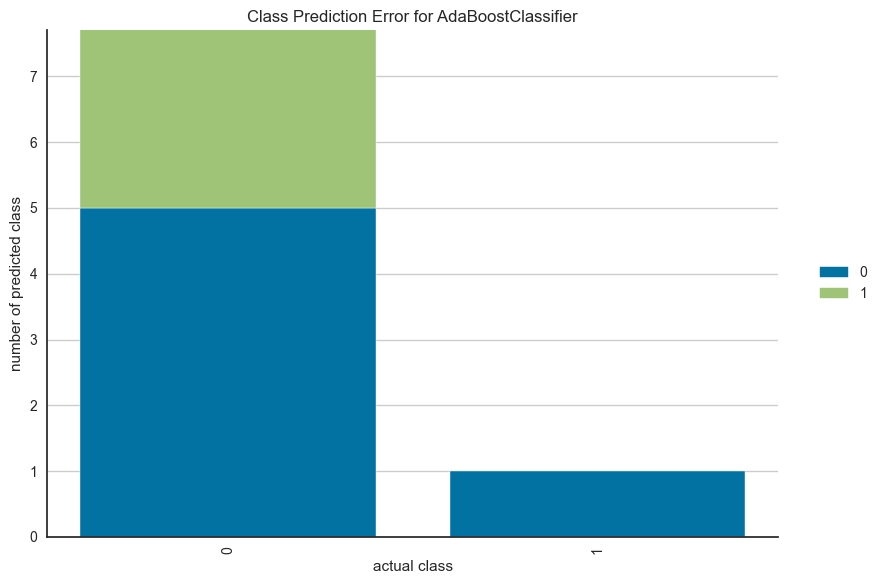

In [23]:
try:
    c.plot_model(estimator=model, plot='error')
except:
    pass

In [24]:
try:
    c.plot_model(tuned_all, plot='confusion_matrix')
except:
    pass

IntProgress(value=0, description='Processing: ', max=5)

<Figure size 1000x600 with 0 Axes>

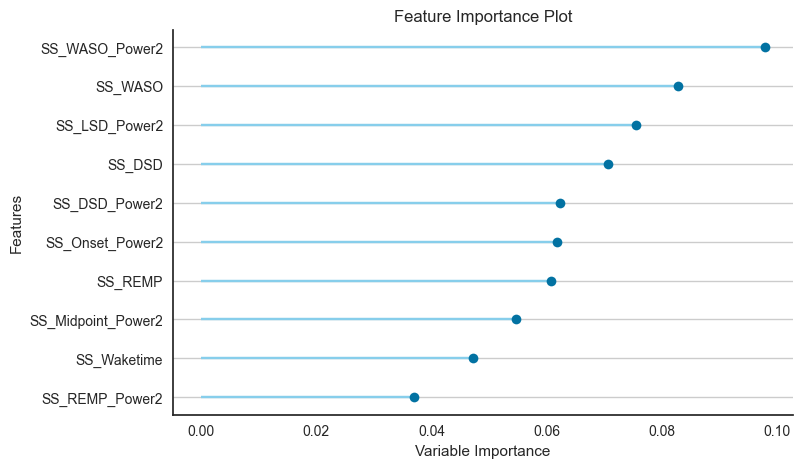

In [25]:
try:
    c.plot_model(tuned_all, plot='feature')
except:
    pass

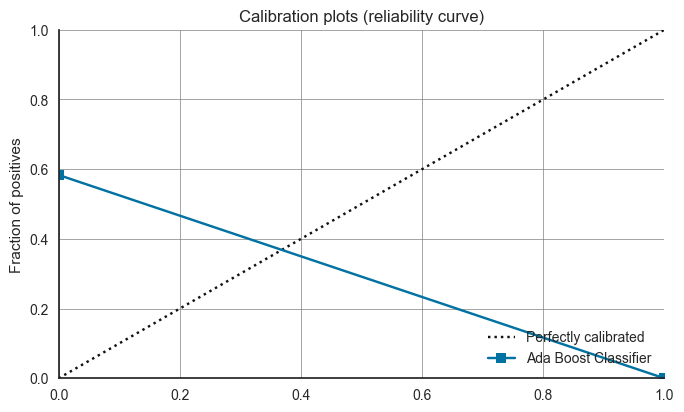

In [26]:
try:
    c.plot_model(estimator=model, plot='calibration')
except:
    pass

### Fitbit Sleep

In [30]:
columns = ['Mood_bin_num', 'FB_Onset', 'FB_Offset', 'FB_TST', 'FB_WASO',
       'FB_NOA', 'FB_TIB', 'FB_REMSD', 'FB_LSD', 'FB_DSD', 'FB_TSDP', 'FB_AI',
       'FB_SWSP', 'FB_REMP', 'FB_SMI', 'FB_Midpoint',
       'FB_SR']
num =  ['FB_Onset', 'FB_Offset', 'FB_TST', 'FB_WASO',
       'FB_NOA', 'FB_TIB', 'FB_REMSD', 'FB_LSD', 'FB_DSD', 'FB_TSDP', 'FB_AI',
       'FB_SWSP', 'FB_REMP', 'FB_SMI', 'FB_Midpoint',
       'FB_SR']
date = ['Date']
cat = ['Day']
bin_ = ['IsWeekend']

In [31]:
sleep = c.setup(df[columns].dropna(thresh=len(columns) - 2), 
                   target = 'Mood_bin_num', 
                   numeric_features=num, 
                   normalize=True, 
                   polynomial_features=True, 
                   fix_imbalance=True,
               session_id=101)

,Description,Value
0,session_id,101
1,Target,Mood_bin_num
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(45, 17)"
5,Missing Values,True
6,Numeric Features,16
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [32]:
best_sleep = c.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.5833,0.5000,1.0000,0.5833,0.7267,0.0000,0.0000,0.0080
ada,Ada Boost Classifier,0.4667,0.4500,0.5000,0.5167,0.4800,-0.0600,-0.0500,0.0340
lightgbm,Light Gradient Boosting Machine,0.4167,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0090
dummy,Dummy Classifier,0.4167,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0070
lr,Logistic Regression,0.3917,0.2000,0.4000,0.3667,0.3800,-0.2800,-0.3077,0.0090
svm,SVM - Linear Kernel,0.3917,0.0000,0.4500,0.4000,0.4033,-0.2500,-0.2577,0.0090
knn,K Neighbors Classifier,0.3667,0.3750,0.3500,0.4000,0.3500,-0.2200,-0.2500,0.0110
nb,Naive Bayes,0.3667,0.3500,0.4000,0.3667,0.3633,-0.2500,-0.2500,0.0090
ridge,Ridge Classifier,0.3667,0.0000,0.4000,0.3667,0.3800,-0.3300,-0.3500,0.0060
gbc,Gradient Boosting Classifier,0.3667,0.3250,0.4500,0.4333,0.4167,-0.2400,-0.2500,0.0270


In [33]:
tuned_sleep = c.tune_model(best_sleep)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,-1.0000
1,0.3333,0.5000,0.5000,0.5000,0.5000,-0.5000,-0.5000
2,0.6667,0.5000,0.5000,1.0000,0.6667,0.4000,0.5000
3,0.3333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6667,0.5000,1.0000,0.6667,0.8000,0.0000,0.0000
5,0.6667,0.0000,1.0000,0.6667,0.8000,0.0000,0.0000
6,0.6667,1.0000,0.5000,1.0000,0.6667,0.4000,0.5000
7,0.3333,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6667,1.0000,1.0000,0.5000,0.6667,0.4000,0.5000


In [34]:
print(tuned_sleep)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.95,
                              store_covariance=False, tol=0.0001)


In [35]:
model = tuned_sleep

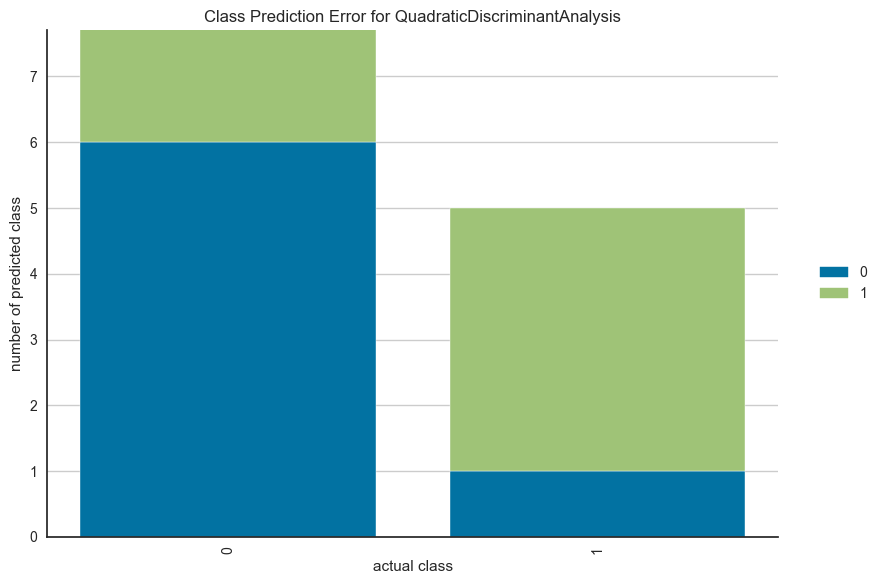

In [36]:
try:
    c.plot_model(estimator=model, plot='error')
except:
    pass

In [37]:
try:
    c.plot_model(tuned_all, plot='confusion_matrix')
except:
    pass

IntProgress(value=0, description='Processing: ', max=5)

<Figure size 1000x600 with 0 Axes>

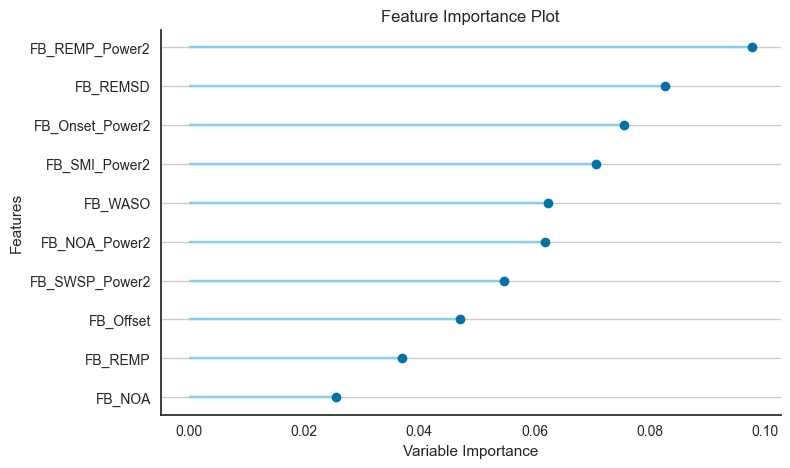

In [38]:
try:
    c.plot_model(tuned_all, plot='feature')
except:
    pass

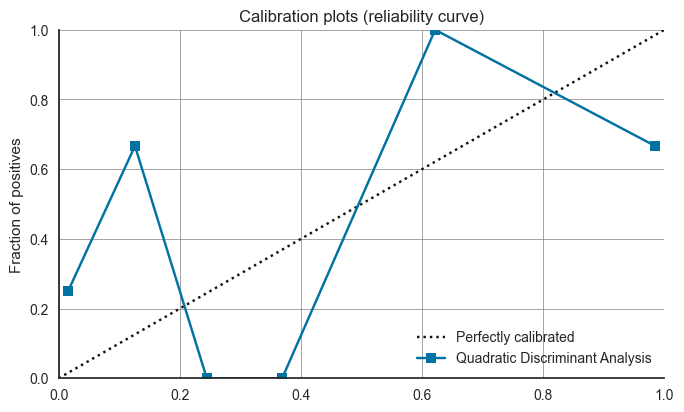

In [39]:
try:
    c.plot_model(estimator=model, plot='calibration')
except:
    pass

### Fitbit Activity

In [40]:
columns = ['Mood_bin_num', 'CaloriesBurned', 'Steps', 'Distance',
       'Floors', 'SedentaryMinutes', 'LightlyActiveMinutes',
       'FairlyActiveMinutes', 'VeryActiveMinutes', 'ActivityCalories',
       'CaloriesBurned_R7DM', 'Steps_R7DM', 'Distance_R7DM', 'Floors_R7DM',
       'SedentaryMinutes_R7DM', 'LightlyActiveMinutes_R7DM',
       'FairlyActiveMinutes_R7DM', 'VeryActiveMinutes_R7DM',
       'ActivityCalories_R7DM']
num =  ['CaloriesBurned', 'Steps', 'Distance',
       'Floors', 'SedentaryMinutes', 'LightlyActiveMinutes',
       'FairlyActiveMinutes', 'VeryActiveMinutes', 'ActivityCalories',
       'CaloriesBurned_R7DM', 'Steps_R7DM', 'Distance_R7DM', 'Floors_R7DM',
       'SedentaryMinutes_R7DM', 'LightlyActiveMinutes_R7DM',
       'FairlyActiveMinutes_R7DM', 'VeryActiveMinutes_R7DM',
       'ActivityCalories_R7DM']

In [41]:
activity = c.setup(df[columns].dropna(thresh=len(columns) - 2), 
                   target = 'Mood_bin_num', 
                   numeric_features=num, 
                   normalize=True, 
                   polynomial_features=True, 
                   fix_imbalance=True,
                  session_id=101)

,Description,Value
0,session_id,101
1,Target,Mood_bin_num
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(50, 19)"
5,Missing Values,False
6,Numeric Features,18
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [42]:
best_activity = c.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6500,0.5000,1.0000,0.6500,0.7848,0.0000,0.0000,0.0080
et,Extra Trees Classifier,0.5667,0.3625,0.8500,0.6333,0.7033,-0.0500,-0.0500,0.0800
knn,K Neighbors Classifier,0.5000,0.4500,0.6000,0.6167,0.5800,-0.0600,-0.0667,0.0100
lightgbm,Light Gradient Boosting Machine,0.5000,0.6125,0.5500,0.4667,0.4967,0.0900,0.0500,0.0090
dt,Decision Tree Classifier,0.4917,0.4167,0.6833,0.5333,0.5900,-0.1667,-0.1589,0.0070
svm,SVM - Linear Kernel,0.4833,0.0000,0.5333,0.5917,0.5324,-0.1300,-0.1089,0.0080
lr,Logistic Regression,0.4750,0.3000,0.6333,0.5750,0.5757,-0.1600,-0.1512,0.0090
lda,Linear Discriminant Analysis,0.4500,0.4792,0.4333,0.5833,0.4733,-0.0300,-0.0244,0.0070
nb,Naive Bayes,0.4250,0.2667,0.5667,0.5833,0.5500,-0.2300,-0.2089,0.0060
ridge,Ridge Classifier,0.4250,0.0000,0.5500,0.5167,0.5067,-0.2233,-0.2423,0.0060


In [43]:
tuned_act = c.tune_model(best_activity)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,1.0000,0.5000,1.0000,0.6667,0.5000,0.5774
1,0.5000,0.5000,1.0000,0.5000,0.6667,0.0000,0.0000
2,0.2500,0.0000,0.3333,0.5000,0.4000,-0.5000,-0.5774
3,0.5000,1.0000,0.3333,1.0000,0.5000,0.2000,0.3333
4,0.6667,0.0000,1.0000,0.6667,0.8000,0.0000,0.0000
5,0.6667,1.0000,1.0000,0.6667,0.8000,0.0000,0.0000
6,0.6667,0.5000,1.0000,0.6667,0.8000,0.0000,0.0000
7,0.3333,0.5000,0.5000,0.5000,0.5000,-0.5000,-0.5000
8,0.6667,0.0000,1.0000,0.6667,0.8000,0.0000,0.0000


In [44]:
print(tuned_act)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.09,
                              store_covariance=False, tol=0.0001)


In [45]:
model = tuned_act

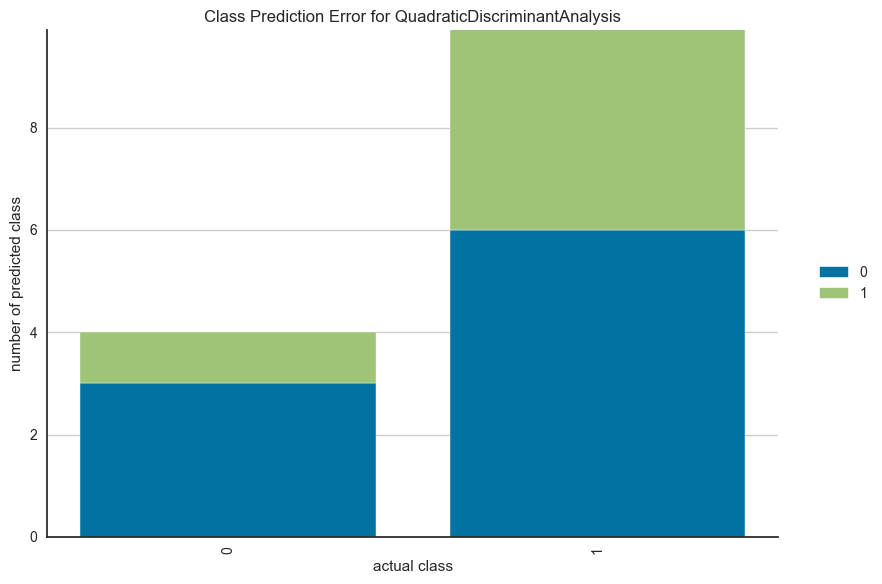

In [46]:
try:
    c.plot_model(estimator=model, plot='error')
except:
    pass

In [47]:
try:
    c.plot_model(tuned_all, plot='confusion_matrix')
except:
    pass

IntProgress(value=0, description='Processing: ', max=5)

<Figure size 1000x600 with 0 Axes>

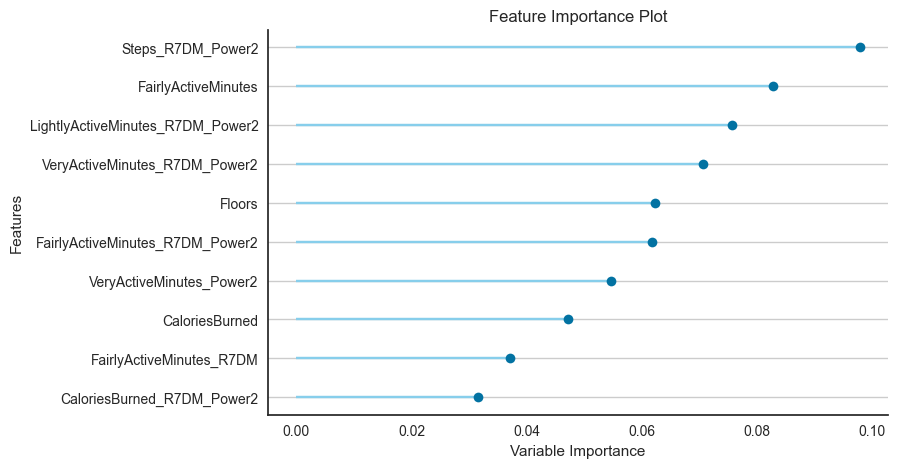

In [48]:
try:
    c.plot_model(tuned_all, plot='feature')
except:
    pass

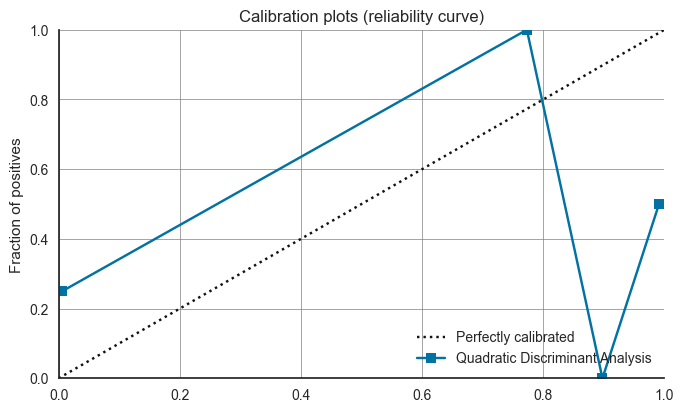

In [49]:
try:
    c.plot_model(estimator=model, plot='calibration')
except:
    pass

### Mood Activity and Sleep Log Data

In [50]:
columns = ['Mood_bin_num', 'Entertainment', 'Exercise', 'Family', 'Food', 'Friends', 'Hobby',
       'Love', 'Music', 'NightOut', 'Projects', 'School', 'SelfCare', 'Sleep',
       'CaffeineCups', 'AlcoholDrinks', 'Stress', 'Sleepiness',
       'PreviousNightMood', 'StressR7DM',
       'SleepinessR7DM', 'AtHome']
num =  ['CaffeineCups', 'AlcoholDrinks', 'Stress', 'Sleepiness',
       'PreviousNightMood', 'StressR7DM',
       'SleepinessR7DM', 'Entertainment', 'Exercise', 'Family', 'Food', 'Friends', 'Hobby',
       'Love', 'Music', 'NightOut', 'Projects', 'School', 'SelfCare', 'Sleep']

In [51]:
log = c.setup(df[columns].dropna(thresh=len(columns) - 2), 
               target = 'Mood_bin_num', 
               numeric_features=num,
               normalize=True, 
               polynomial_features=True, 
               fix_imbalance=True,
             session_id=101)

,Description,Value
0,session_id,101
1,Target,Mood_bin_num
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(42, 22)"
5,Missing Values,True
6,Numeric Features,21
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [52]:
best_mood = c.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9667,0.9750,0.9500,1.0000,0.9667,0.9400,0.9500,0.0080
gbc,Gradient Boosting Classifier,0.9333,0.9750,0.9500,0.9667,0.9467,0.8400,0.8500,0.0220
rf,Random Forest Classifier,0.9000,0.9000,0.9500,0.9167,0.9300,0.7500,0.7500,0.0860
ada,Ada Boost Classifier,0.9000,1.0000,0.8500,1.0000,0.9000,0.8200,0.8500,0.0340
et,Extra Trees Classifier,0.8833,1.0000,0.9500,0.9167,0.9133,0.7400,0.7500,0.0700
knn,K Neighbors Classifier,0.8500,0.8250,0.9000,0.8167,0.8467,0.7000,0.7000,0.0110
nb,Naive Bayes,0.8167,0.8250,0.8500,0.9167,0.8467,0.6200,0.6500,0.0080
ridge,Ridge Classifier,0.8167,0.0000,0.8000,0.8500,0.8000,0.6800,0.7000,0.0070
lr,Logistic Regression,0.7833,0.9500,0.8000,0.8167,0.7800,0.5800,0.6000,0.0090
svm,SVM - Linear Kernel,0.7500,0.0000,0.7500,0.9167,0.7800,0.5000,0.5500,0.0100


In [53]:
tuned_mood = c.tune_model(best_mood)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.6667,0.7500,0.5000,1.0000,0.6667,0.4000,0.5000
5,0.6667,0.7500,0.5000,1.0000,0.6667,0.4000,0.5000
6,0.6667,0.7500,0.5000,1.0000,0.6667,0.4000,0.5000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [54]:
print(tuned_mood)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')


In [55]:
model = tuned_mood

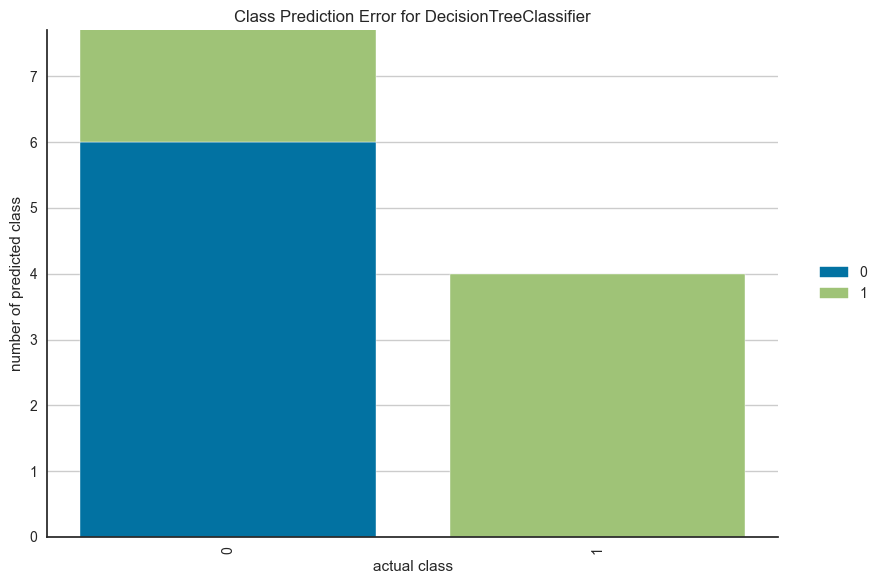

In [56]:
try:
    c.plot_model(estimator=model, plot='error')
except:
    pass

In [57]:
try:
    c.plot_model(tuned_all, plot='confusion_matrix')
except:
    pass

IntProgress(value=0, description='Processing: ', max=5)

<Figure size 1000x600 with 0 Axes>

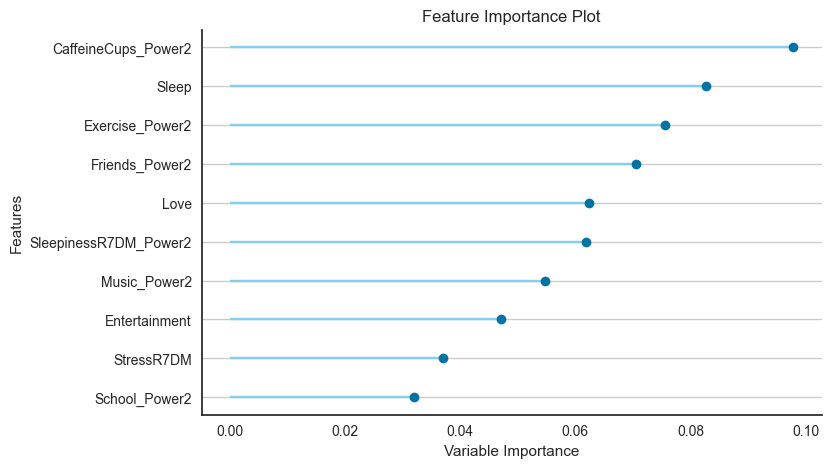

In [58]:
try:
    c.plot_model(tuned_all, plot='feature')
except:
    pass

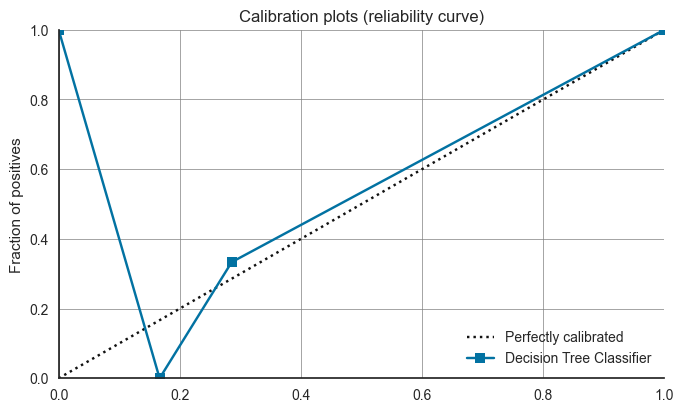

In [59]:
try:
    c.plot_model(estimator=model, plot='calibration')
except:
    pass

## SleepScore Prediction using Fitbit Data
The SleepScore metric is calculated using 4 key variables, total sleep duration, your time taken to fall asleep, your time in light sleep, deep sleep, and REM sleep, and the number and duration of awakenings you have each night.

The fitbit data does not calculated time taken to fall asleep but most of the other sleep variables are available.

### Feature Selection

In [60]:
df.columns

Index(['Date', 'Mood', 'Mood_num', 'Mood_bin', 'Mood_bin_num', 'Time', 'Day',
       'Entertainment', 'Exercise', 'Family', 'Food', 'Friends', 'Hobby',
       'Love', 'Music', 'NightOut', 'Projects', 'School', 'SelfCare', 'Sleep',
       'CaffeineCups', 'AlcoholDrinks', 'Stress', 'Sleepiness',
       'PreviousNightMood', 'StressR7DM', 'SleepinessR7DM', 'AtHome',
       'CaloriesBurned', 'Steps', 'Distance', 'Floors', 'SedentaryMinutes',
       'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes',
       'ActivityCalories', 'CaloriesBurned_R7DM', 'Steps_R7DM',
       'Distance_R7DM', 'Floors_R7DM', 'SedentaryMinutes_R7DM',
       'LightlyActiveMinutes_R7DM', 'FairlyActiveMinutes_R7DM',
       'VeryActiveMinutes_R7DM', 'ActivityCalories_R7DM', 'FB_Onset',
       'FB_Offset', 'FB_TST', 'FB_WASO', 'FB_NOA', 'FB_TIB', 'FB_REMSD',
       'FB_LSD', 'FB_DSD', 'FB_TSDP', 'FB_AI', 'FB_SWSP', 'FB_REMP', 'FB_SMI',
       'FB_MWD', 'FB_Midpoint', 'IsWeekend', 'FB_SR', 'SS_Bedtime', 'S

In [61]:
columns = ['SS_SS', 'FB_Onset', 'FB_Offset', 'FB_TST', 'FB_WASO',
       'FB_NOA', 'FB_TIB', 'FB_REMSD', 'FB_LSD', 'FB_DSD', 'FB_TSDP', 'FB_AI',
       'FB_SWSP', 'FB_REMP', 'FB_SMI', 'FB_MWD', 'FB_Midpoint',
       'FB_SR']

In [62]:
# Setting a threshold for correlation
threshold = 0.25
corr = abs(df[columns].corr()[['SS_SS']])
corr = corr[corr > threshold].dropna(how='any')

In [63]:
features = list(corr.index)# removing mood_num and mood_bin_num

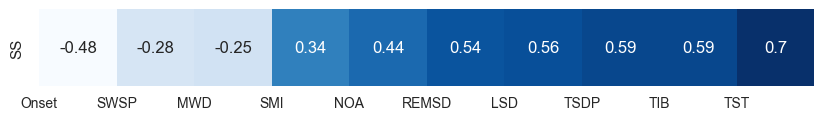

In [64]:
fig, ax = plt.subplots(figsize=(10, 1))
sns.heatmap(df[features].corr()[['SS_SS']][1:].sort_values(by='SS_SS').transpose(), 
            cbar=None, cmap='Blues', annot=True)
plt.xticks(rotation=0, 
           labels=[t.get_text()[3:] for t in ax.get_xticklabels()], 
           ticks=range(len(features) - 1))
plt.yticks(rotation=0,
           labels=['' for t in ax.get_yticklabels()],
           ticks=range(1))
plt.ylabel('SS', rotation=90)
plt.savefig('../visuals/models/fitbit_ss/SS_Heatmap.png', bbox_inches = 'tight');

In [65]:
df[features].dropna(thresh=len(features) - 3).shape

(45, 11)

### Model Development

In [66]:
ss_fitbit = r.setup(df[features].dropna(thresh=len(features) - 3), 
                   target = 'SS_SS', session_id=101)

,Description,Value
0,session_id,101
1,Target,SS_SS
2,Original Data,"(45, 11)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(25, 9)"


In [67]:
best_ss = r.compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,4.5928,42.8461,5.7098,-1.5677,0.0707,0.0580,0.0070
huber,Huber Regressor,4.6585,37.9505,5.4417,-1.1901,0.0672,0.0587,0.0130
omp,Orthogonal Matching Pursuit,4.6763,42.0775,5.7156,-1.5990,0.0709,0.0593,0.0070
en,Elastic Net,4.6919,44.0146,5.8169,-1.6567,0.0720,0.0591,0.0060
br,Bayesian Ridge,4.7529,41.9072,5.8250,-1.4987,0.0720,0.0599,0.0070
dummy,Dummy Regressor,4.8391,47.9179,6.0572,-0.5602,0.0738,0.0612,0.0050
llar,Lasso Least Angle Regression,4.9058,48.5643,6.1437,-0.6641,0.0749,0.0620,0.0060
ridge,Ridge Regression,5.1429,48.5325,6.1538,-1.7582,0.0757,0.0643,0.0060
et,Extra Trees Regressor,5.5748,61.4553,6.7894,-1.5308,0.0829,0.0707,0.0580
ada,AdaBoost Regressor,5.7975,59.2906,6.8457,-1.3846,0.0831,0.0729,0.0270


In [79]:
#tuned_ss = r.load_model('../models/SleepScoreLassoRegressionModel')
tuned_ss = r.tune_model(best_ss, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3601,16.5764,4.0714,0.5424,0.0470,0.0400
1,7.1602,118.8725,10.9029,0.2225,0.1578,0.1168
2,2.5897,8.6993,2.9495,0.7281,0.0328,0.0288
3,7.7593,103.5300,10.1750,-15.6388,0.1249,0.0887
4,1.2903,3.7699,1.9416,0.8176,0.0232,0.0160
5,3.2421,15.5949,3.9490,0.4845,0.0465,0.0393
6,5.0419,31.2385,5.5891,-0.9524,0.0682,0.0639
7,5.0924,35.3230,5.9433,-1.8835,0.0701,0.0589
8,0.8935,1.4033,1.1846,0.3763,0.0138,0.0106


In [80]:
print(tuned_ss)

Lasso(alpha=4.0, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=101,
      selection='cyclic', tol=0.0001, warm_start=False)


In [81]:
r.predict_model(tuned_ss)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,2.2325,8.2058,2.8646,0.8211,0.0326,0.0257


,FB_Onset,FB_TST,FB_NOA,FB_REMSD,FB_LSD,FB_TSDP,FB_SWSP,FB_SMI,FB_MWD,SS_SS,Label
0,22.549999,437.0,32.0,84.0,297.0,528.0,12.814646,82.765152,2.843750,92.0,87.023811
1,23.400000,414.0,33.0,65.0,263.0,472.0,20.772947,87.711861,1.757576,88.0,87.272949
2,23.250000,418.0,33.0,63.0,271.0,489.0,20.095694,85.480576,2.151515,89.0,86.586388
3,23.566668,422.0,33.0,109.0,203.0,474.0,26.066351,89.029533,1.575758,93.0,88.581139
4,23.750000,396.0,31.0,83.0,253.0,462.0,15.151515,85.714287,2.129032,86.0,84.774956
5,23.150000,382.0,28.0,53.0,247.0,446.0,21.465969,85.650223,2.285714,79.0,83.523598
6,22.416666,480.0,28.0,61.0,338.0,528.0,16.875000,90.909088,1.714286,94.0,94.440155
7,26.000000,295.0,24.0,43.0,180.0,356.0,24.406780,82.865166,2.541667,75.0,74.556526
8,26.400000,274.0,18.0,42.0,166.0,306.0,24.087591,89.542480,1.777778,77.0,76.075272


### Evaluating Model

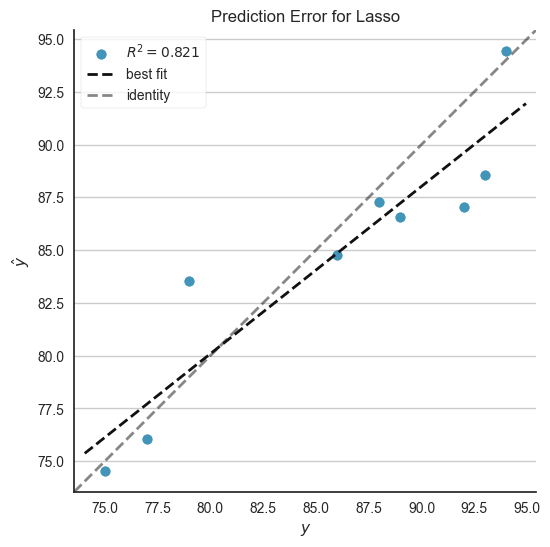

In [83]:
r.plot_model(tuned_ss, plot='error')

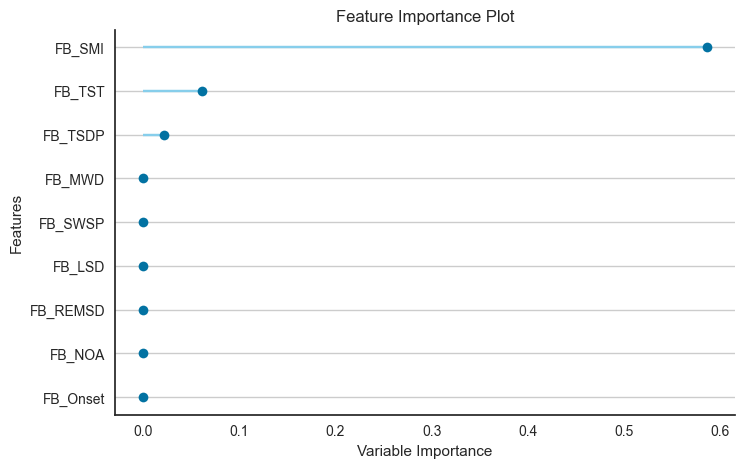

In [84]:
r.plot_model(tuned_ss, plot='feature')

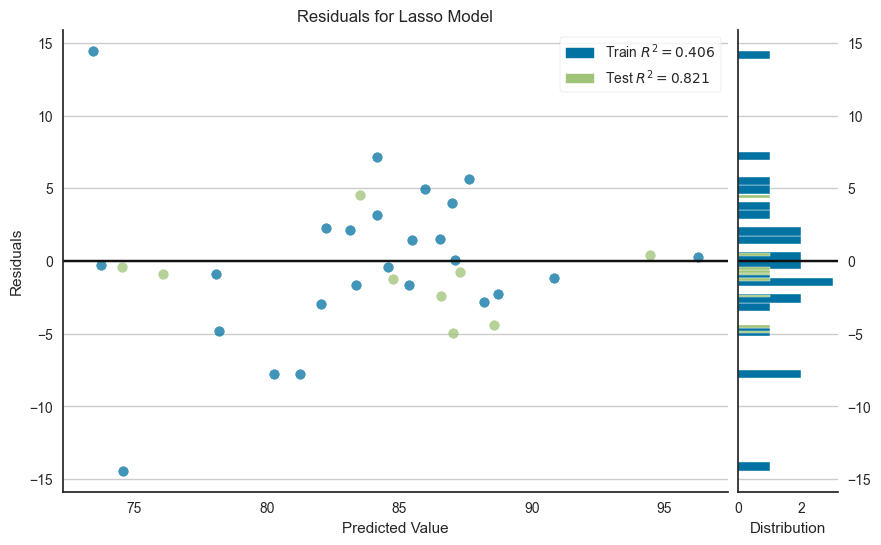

In [85]:
r.plot_model(tuned_ss, plot='residuals')

### Saving Lasso Regression Model

In [86]:
r.save_model(tuned_ss, '../models/SleepScoreLassoRegressionModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='SS_SS',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                 ('fix_perfect', Remove_100(target='SS_SS')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
              

## Saving Model Evaluation Plots

In [87]:
reg_models = [tuned_ss]
reg_plots = ['error', 'feature', 'residuals']
class_models = []#tuned_all, tuned_sleepscore, tuned_sleep, tuned_act, tuned_mood]
class_plots = ['error', 'feature', 'confusion_matrix', 'calibration']
model_dir = {
    tuned_ss: 'fitbit_ss'} 
"""    tuned_all: 'initial_all', 
    tuned_sleepscore: 'sleepscore',
    tuned_sleep: 'sleep',
    tuned_act: 'activity',
    tuned_mood: 'mood_log'
}"""
for lib, models, plots in [(r, reg_models, reg_plots), (c, class_models, class_plots)]:
    for model in models:
        path = f'../visuals/models/{model_dir[model]}'
        for plot in plots:
            try:
                lib.plot_model(estimator=model, plot=plot, save=path, scale=0.5)
            except:
                pass